In [1]:
import pandas as pd
import seaborn as sns

In [2]:
meteo_2021 = pd.read_csv('meteo_202109-202112.csv', encoding='IBM860')

In [3]:
meteo_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   city_name            2928 non-null   object 
 3   temp                 2928 non-null   float64
 4   feels_like           2928 non-null   float64
 5   temp_min             2928 non-null   float64
 6   temp_max             2928 non-null   float64
 7   pressure             2928 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             2928 non-null   int64  
 11  wind_speed           2928 non-null   float64
 12  rain_1h              537 non-null    float64
 13  clouds_all           2928 non-null   int64  
 14  weather_description  2928 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

<Axes: >

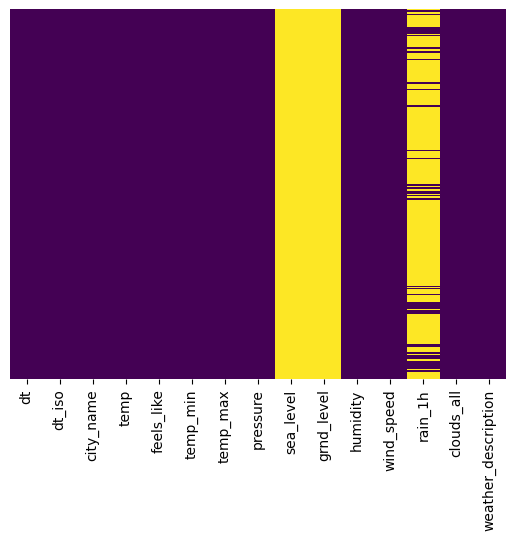

In [4]:
sns.heatmap(meteo_2021.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [5]:
meteo_2021.drop('sea_level', axis=1, inplace=True)
meteo_2021.drop('grnd_level', axis=1, inplace=True)

#or missing values => 0...
meteo_2021.drop('rain_1h', axis=1, inplace=True)
#meteo_2021['rain_1h'].fillna(0, inplace=True)

In [6]:
meteo_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   city_name            2928 non-null   object 
 3   temp                 2928 non-null   float64
 4   feels_like           2928 non-null   float64
 5   temp_min             2928 non-null   float64
 6   temp_max             2928 non-null   float64
 7   pressure             2928 non-null   int64  
 8   humidity             2928 non-null   int64  
 9   wind_speed           2928 non-null   float64
 10  clouds_all           2928 non-null   int64  
 11  weather_description  2928 non-null   object 
dtypes: float64(5), int64(4), object(3)
memory usage: 274.6+ KB


In [7]:
meteo_2021.duplicated().sum()

0

In [8]:
meteo_2021.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,83,1.18,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,83,1.46,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,88,1.05,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,86,0.46,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,89,0.93,95,moderate rain


In [9]:
lista = []
for i in range (meteo_2021['dt_iso'].size):
    s = meteo_2021['dt_iso'][i]
    lista.append (s[0:19])
    
meteo_2021['dt_iso'] = lista
meteo_2021['dt_iso'] = pd.to_datetime (meteo_2021['dt_iso'], format = '%Y-%m-%d %H:%M:%S')

meteo_2021.rename(columns={'dt_iso': 'Data & Hora'}, inplace=True)

In [10]:
meteo_2021.head()

,dt,Data & Hora,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00,local,18.74,18.84,15.72,20.34,1015,83,1.18,78,broken clouds
1,1630458000,2021-09-01 01:00:00,local,18.73,18.83,15.72,20.34,1014,83,1.46,92,overcast clouds
2,1630461600,2021-09-01 02:00:00,local,17.84,17.98,16.72,20.34,1014,88,1.05,91,overcast clouds
3,1630465200,2021-09-01 03:00:00,local,18.27,18.40,16.68,20.34,1014,86,0.46,94,light rain
4,1630468800,2021-09-01 04:00:00,local,17.81,17.97,16.12,20.34,1013,89,0.93,95,moderate rain


In [11]:
meteo_2021.drop('dt', axis=1, inplace=True)

<Axes: >

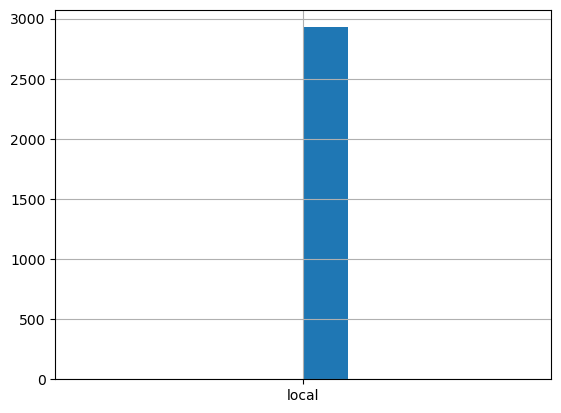

In [12]:
meteo_2021['city_name'].hist()

In [13]:
meteo_2021.drop('city_name', axis=1, inplace=True)

In [14]:
meteo_2021.to_csv("meteo_2021.csv", encoding='utf-8')